# LDA - Latent Dirichlet Allocation

## Optimization

In [24]:
from octis.models.LDA import LDA
from octis.dataset.dataset import Dataset
from octis.evaluation_metrics.diversity_metrics import TopicDiversity
from octis.evaluation_metrics.coherence_metrics import Coherence

In [25]:
dataset_save = 'dataset'

In [26]:
dataset = Dataset()
dataset.load_custom_dataset_from_folder(dataset_save)

### Train a Model

In [27]:
# Create Model
model = LDA()

In [28]:
from octis.dataset.dataset import Dataset
from octis.models.LDA import LDA

model_output = model.train_model(dataset)

### Evaluate a Model

In [29]:
for t in model_output['topics']:
  print(" ".join(t))

patrizio impossibile magnifica circostanti orvieto etruschi vista piccolo gode attrazione
chiesa luogo trova santa maria clitunno custode tempio mura posta
antica chiesa amerina area molto risalente sud vetro interventi differente
antica citta san via antiquarium narni cattedrale origine xii pregevoli
santuario rigone casa secondo origini frazione raggiungere recarsi prima san
nucleo san pia abitato francesco chiesa cima flebeo urbano preghiera
lago collina segua molto protezione marchesi cima costruito opera possedevano
lungo piazza snoda chiesa pressi pia piazze todi torgiano monumento
generazione solo costruito oggi medievale borgo centro visitabile conteso legna
clitunno acqua piedi comune presenza turistica meta umbra tempio dominante
ponte chiesa reggia santa maria torrente costruito xvi vicino costruzione
paleocristiano san fine eretto secolo edificio basilica interessantissimo salvatore inizio
interno perimetrale michele xiv arcangelo secolo castello ridosso san sorta
francesco

In [71]:
len(model_output['topics'])

100

In [30]:
# Initialize metric
npmi = Coherence(texts=dataset.get_corpus(), topk=10, measure='c_npmi')

In [31]:
# Initialize metric
topic_diversity = TopicDiversity(topk=10)

In [32]:
# Retrieve metrics score
topic_diversity_score = topic_diversity.score(model_output)
print("Topic diversity: "+str(topic_diversity_score))

npmi_score = npmi.score(model_output)
print("Coherence: "+str(npmi_score))

Topic diversity: 0.566
Coherence: -0.13421145938496226


### Hyperparameter Optimization

In [35]:
from octis.optimization.optimizer import Optimizer
from skopt.space.space import Real
from skopt.space.space import Real, Integer

### Topic Diversity

In [49]:
# Define the search space. To see which hyperparameters to optimize, see the topic model's initialization signature
search_space = {"alpha": Real(low=0.001, high=5.0), "eta": Real(low=0.001, high=5.0), "num_topics": Integer(low=5, high=15)}

# Initialize an optimizer object and start the optimization.
optimizer=Optimizer()
optResult=optimizer.optimize(model, dataset, topic_diversity, search_space, save_path="result", # path to store the results
                             number_of_call=30, # number of optimization iterations
                             model_runs=5,save_models=False) # number of runs of the topic model
#save the results of th optimization in a csv file
optResult.save_to_csv("result_TD.csv")

Current call:  0
Current call:  1
Current call:  2
Current call:  3
Current call:  4
Current call:  5
Current call:  6
Current call:  7
Current call:  8
Current call:  9
Current call:  10
Current call:  11
Current call:  12
Current call:  13
Current call:  14
Current call:  15
Current call:  16
Current call:  17
Current call:  18
Current call:  19
Current call:  20
Current call:  21
Current call:  22
Current call:  23
Current call:  24
Current call:  25
Current call:  26
Current call:  27
Current call:  28
Current call:  29


In [51]:
import json
res = json.load(open("result/result_TD.json",'r'))
res.keys()

dict_keys(['dataset_name', 'dataset_path', 'is_cached', 'kernel', 'acq_func', 'surrogate_model', 'optimization_type', 'model_runs', 'save_models', 'save_step', 'save_name', 'save_path', 'early_stop', 'early_step', 'plot_model', 'plot_best_seen', 'plot_name', 'log_scale_plot', 'search_space', 'model_name', 'model_attributes', 'use_partitioning', 'metric_name', 'extra_metric_names', 'metric_attributes', 'extra_metric_attributes', 'current_call', 'number_of_call', 'random_state', 'x0', 'y0', 'n_random_starts', 'initial_point_generator', 'topk', 'time_eval', 'dict_model_runs', 'f_val', 'x_iters'])

In [52]:
# valuto qual è l'iterazione migliore
print("Valore migliore di Topic Diversity ottenuto: " )
print(max(res["f_val"]))
print("Numero di iterazione: ")
i = 0
for j in res["f_val"]:
  if(j == max(res["f_val"])):
    i += 1
    print(i)
    break
  else:
    i += 1
print("Valore di alpha:")
print(res['x_iters']['alpha'][i-1])
print("Valore di eta:")
print(res['x_iters']['eta'][i-1])
print("Numero di topic:")
print(res['x_iters']['num_topics'][i-1])

Valore migliore ottenuto: 
0.45
Numero di iterazione: 
25
Valore di alpha:
0.29621673756304395
Valore di eta:
4.41131880797779
Numero di topic:
6


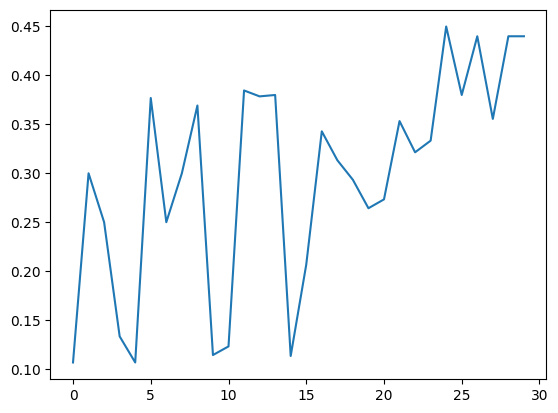

In [53]:
import matplotlib.pyplot as plt

plt.plot(res["f_val"])

In [54]:
optimizer=Optimizer()
optimization_result = optimizer.resume_optimization('result/result_TD.json',extra_evaluations=5)

Current call:  30
Current call:  31
Current call:  32
Current call:  33
Current call:  34


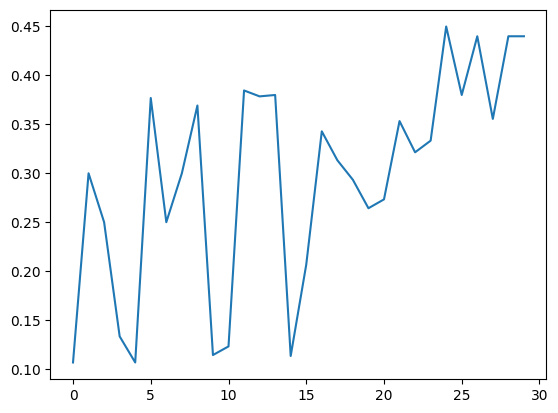

In [55]:
res = json.load(open("result/result_TD.json",'r'))
plt.plot(res["f_val"])

In [77]:
# Create Model
model = LDA(num_topics=6, alpha= 0.29621673756304395, eta= 4.41131880797779)

In [78]:
model_output = model.train_model(dataset)

In [ ]:
print(*list(model_output.keys()), sep="\n") # Print the output identifiers

In [ ]:
for t in model_output['topics']:
  print(" ".join(t))

In [79]:
corpus_processed = pd.read_csv('dataset/corpus.tsv', sep='\t', header=None)
new_df = pd.DataFrame(corpus_processed[0])

In [80]:
len(model_output['topics'])

6

In [81]:
num = 1
for topic in model_output['topic-document-matrix']:
  for i in range(0,len(topic)):
    new_df.loc[i,num] = topic[i]
  num = num+1
new_df

,0,1,2,3,4,5,6
0,qui possiamo ammirare resti porta accesso anti...,0.025778,0.025439,0.025729,0.872012,0.025413,0.025628
1,posizione dominante valle risacco val rasina r...,0.011193,0.011132,0.019168,0.011156,0.011170,0.936181
2,collegiata santa maria assunta risale stile as...,0.027393,0.027409,0.861571,0.028243,0.027773,0.027610
3,unica navata ampia luminosa due nicchioni due ...,0.017766,0.017678,0.017711,0.017767,0.017621,0.911458
4,contesto urbano datazione xiii secolo chiesa s...,0.014093,0.013734,0.929847,0.014389,0.013976,0.013962
...,...,...,...,...,...,...,...
568,santuario madonna assunta cielo xii secolo sti...,NaN,NaN,NaN,NaN,NaN,NaN
569,antico castello medievale assedi miracoli reli...,NaN,NaN,NaN,NaN,NaN,NaN
570,splendido castello pupaggi comune sellano luog...,NaN,NaN,NaN,NaN,NaN,NaN
571,esistono due tipologie prosciutto norcia primo...,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
# Retrieve metrics score
topic_diversity_score = topic_diversity.score(model_output)
print("Topic diversity: "+str(topic_diversity_score))

npmi_score = npmi.score(model_output)
print("Coherence: "+str(npmi_score))

Topic diversity: 0.38333333333333336
Coherence: -0.029192896555307834


### Topic Coherence

In [56]:
# Define the search space. To see which hyperparameters to optimize, see the topic model's initialization signature
search_space = {"alpha": Real(low=0.001, high=5.0), "eta": Real(low=0.001, high=5.0), "num_topics": Integer(low=5, high=15)}

# Initialize an optimizer object and start the optimization.
optimizer=Optimizer()
optResult=optimizer.optimize(model, dataset, npmi, search_space, save_path="result", # path to store the results
                             number_of_call=30, # number of optimization iterations
                             model_runs=5,save_models=False) # number of runs of the topic model
#save the results of th optimization in a csv file
optResult.save_to_csv("result/result_npmi.csv")

Current call:  0
Current call:  1
Current call:  2
Current call:  3
Current call:  4
Current call:  5
Current call:  6
Current call:  7
Current call:  8
Current call:  9
Current call:  10
Current call:  11
Current call:  12
Current call:  13
Current call:  14
Current call:  15
Current call:  16
Current call:  17
Current call:  18
Current call:  19
Current call:  20
Current call:  21
Current call:  22
Current call:  23
Current call:  24
Current call:  25
Current call:  26
Current call:  27
Current call:  28
Current call:  29


In [61]:
import json
res = json.load(open("result/result_npmi.json",'r'))
res.keys()

dict_keys(['dataset_name', 'dataset_path', 'is_cached', 'kernel', 'acq_func', 'surrogate_model', 'optimization_type', 'model_runs', 'save_models', 'save_step', 'save_name', 'save_path', 'early_stop', 'early_step', 'plot_model', 'plot_best_seen', 'plot_name', 'log_scale_plot', 'search_space', 'model_name', 'model_attributes', 'use_partitioning', 'metric_name', 'extra_metric_names', 'metric_attributes', 'extra_metric_attributes', 'current_call', 'number_of_call', 'random_state', 'x0', 'y0', 'n_random_starts', 'initial_point_generator', 'topk', 'time_eval', 'dict_model_runs', 'f_val', 'x_iters'])

In [62]:
# valuto qual è l'iterazione migliore
print("Valore migliore di Topic Coherence ottenuto: " )
print(max(res["f_val"]))
print("Numero di iterazione: ")
i = 0
for j in res["f_val"]:
  if(j == max(res["f_val"])):
    i += 1
    print(i)
    break
  else:
    i += 1
print("Valore di alpha:")
print(res['x_iters']['alpha'][i-1])
print("Valore di eta:")
print(res['x_iters']['eta'][i-1])
print("Numero di topic:")
print(res['x_iters']['num_topics'][i-1])

Valore migliore di Topic Coherence ottenuto: 
0.04189626025966379
Numero di iterazione: 
4
Valore di alpha:
4.509781223032633
Valore di eta:
0.9548581064535537
Numero di topic:
12


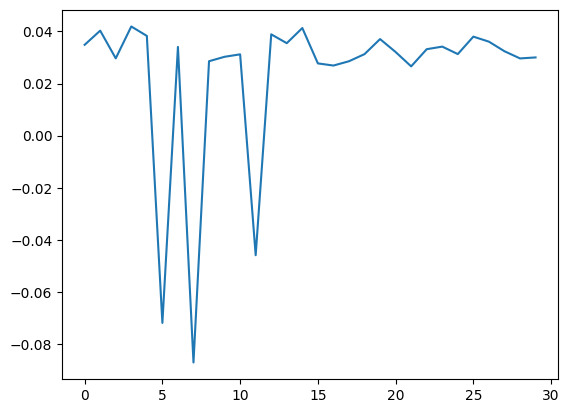

In [63]:
import matplotlib.pyplot as plt

plt.plot(res["f_val"])

In [67]:
corpus_processed = pd.read_csv('dataset/corpus.tsv', sep='\t', header=None)
new_df = pd.DataFrame(corpus_processed[0])